In [1]:
import cv2
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

# CATEGORIES = ["boxing", "handclapping", "handwaving", "jogging", "running", 
#     "walking"]
CATEGORIES = ["boxing","jogging"]

# Setup parameters for optical flow.
farneback_params = dict(winsize = 20, iterations=1,flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN, levels=1,
                        pyr_scale=0.5, poly_n=5, poly_sigma=1.1, flow=None)



## extract features

Processing category boxing
person21_boxing_d2_uncomp.avi
-- features_current_file:  407
person07_boxing_d3_uncomp.avi
-- features_current_file:  383
person02_boxing_d3_uncomp.avi
-- features_current_file:  489
person19_boxing_d4_uncomp.avi
-- features_current_file:  419
person06_boxing_d2_uncomp.avi
-- features_current_file:  407
person24_boxing_d1_uncomp.avi
-- features_current_file:  365
person18_boxing_d2_uncomp.avi
-- features_current_file:  539
person24_boxing_d3_uncomp.avi
-- features_current_file:  389
person17_boxing_d2_uncomp.avi
-- features_current_file:  489
person04_boxing_d4_uncomp.avi
-- features_current_file:  377
person16_boxing_d3_uncomp.avi
-- features_current_file:  529
person10_boxing_d4_uncomp.avi
-- features_current_file:  473
person13_boxing_d4_uncomp.avi
-- features_current_file:  419
person06_boxing_d3_uncomp.avi
-- features_current_file:  391
person01_boxing_d4_uncomp.avi
-- features_current_file:  304
person21_boxing_d3_uncomp.avi
-- features_current_file:  4

-- features_current_file:  319
person18_jogging_d4_uncomp.avi
-- features_current_file:  579
person21_jogging_d2_uncomp.avi
-- features_current_file:  619
person07_jogging_d2_uncomp.avi
-- features_current_file:  455
person22_jogging_d1_uncomp.avi
-- features_current_file:  495
person24_jogging_d3_uncomp.avi
-- features_current_file:  451
person05_jogging_d3_uncomp.avi
-- features_current_file:  351
person11_jogging_d1_uncomp.avi
-- features_current_file:  399
person02_jogging_d1_uncomp.avi
-- features_current_file:  344
person08_jogging_d2_uncomp.avi
-- features_current_file:  477
person15_jogging_d2_uncomp.avi
-- features_current_file:  534
person17_jogging_d3_uncomp.avi
-- features_current_file:  484
person16_jogging_d2_uncomp.avi
-- features_current_file:  509
person09_jogging_d3_uncomp.avi
-- features_current_file:  439
person03_jogging_d2_uncomp.avi
-- features_current_file:  619
person13_jogging_d3_uncomp.avi
-- features_current_file:  479
person16_jogging_d3_uncomp.avi
-- featu

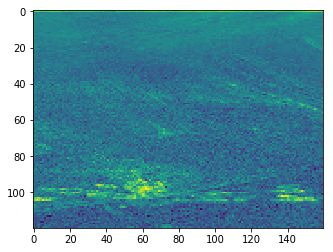

In [2]:
n_processed_files = 0

for category in CATEGORIES:
    print("Processing category %s" % category)

    # Get all files in current category's folder.
#     folder_path = os.path.join("..", "dataset", category)
    folder_path = os.path.join("../data", category)
    filenames = os.listdir(folder_path)

    # List to store features. features[i] stores features for the i-th video
    # in current category.
    features = []

    for filename in filenames:
#     for i in range(1):
#         filename = filenames[0]
        print(filename)
        filepath = os.path.join("../data",category, filename)
        vid = cv2.VideoCapture(filepath)

        # Store features in current file.
        features_current_file = []

        prev_frame = None

        while vid.isOpened():
            ret, frame = vid.read()
            if not ret:
                break
        

            # Only care about gray scale.
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            

            if prev_frame is not None:
                
#                 print('img-size: ', frame.shape)
                
                plt.imshow(frame)
                
                # Calculate optical flow.
                flows = cv2.calcOpticalFlowFarneback(prev_frame, frame,
                    **farneback_params)

#                 print('flows-size: ', flows.shape)

                feature = []
                for r in range(120):
                    if r % 10 != 0:
                        continue
                    for c in range(160):
                        if c % 10 != 0:
                            continue
                        feature.append(flows[r,c,0])
                        feature.append(flows[r,c,1])
                feature = np.array(feature)
#                 print('feature: ', len(feature))

                features_current_file.append(feature)

            prev_frame = frame
            
        print('-- features_current_file: ', len(features_current_file))
        features.append({
            "filename": filename,
            "category": category,
            "features": features_current_file 
        })

        n_processed_files += 1
#         if n_processed_files % 30 == 0:
#             print("Done %d files" % n_processed_files)

    # Dump data to file.
    
    pickle.dump(features, open("../data/optflow_%s.p" % category, "wb"))
    print('features: ',len(features))


## Create dataset-split

In [80]:
train = []
dev = []
test = []

# Store keypoints in training set.
train_keypoints = []

for category in CATEGORIES:
    print("Processing category %s" % category)
    category_features = pickle.load(open("../data/optflow_%s.p" % category, "rb"))
    print(len(category_features[0]['features'][0]))
    #print(category_features[0]['features'][0])

Processing category boxing
384
Processing category jogging
384


In [4]:
TRAIN_PEOPLE_ID = [11, 12, 13, 14, 15, 16, 17, 18]
DEV_PEOPLE_ID = [19, 20, 21, 23, 24, 25, 1, 4]
TEST_PEOPLE_ID = [22, 2, 3, 5, 6, 7, 8, 9, 10]


In [5]:
train = []
dev = []
test = []

# Store keypoints in training set.
train_keypoints = []

for category in CATEGORIES:
    print("Processing category %s" % category)
    category_features = pickle.load(open("../data/optflow_%s.p" % category, "rb"))
#     print(category_features)

    for video in category_features:
        person_id = int(video["filename"].split("_")[0][6:])

        if person_id in TRAIN_PEOPLE_ID:
            train.append(video)

            for frame in video["features"]:
                train_keypoints.append(frame)

        elif person_id in DEV_PEOPLE_ID:
            dev.append(video)
        else:
            test.append(video)

print("Saving train/dev/test set to files")
pickle.dump(train, open("../data/train.p", "wb"))
pickle.dump(dev, open("../data/dev.p", "wb"))
pickle.dump(test, open("../data/test.p", "wb"))

# print("Saving keypoints in training set")
pickle.dump(train_keypoints, open("../data/train_keypoints.p", "wb"))


Processing category boxing
Processing category jogging
Saving train/dev/test set to files


In [6]:
clusters = 200
dataset = "../data/train_keypoints.p"
print("Loading dataset")
train_features = pickle.load(open(dataset, "rb"))
n_features = len(train_features)

print("Number of feature points to run clustering on: %d" % n_features)



Loading dataset
Number of feature points to run clustering on: 30954


In [77]:
len(train_features[20])

384

## Clusterization

In [8]:
from sklearn.cluster import KMeans
from numpy import size

# Clustering with KMeans.
print("Running KMeans clustering")
kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10, n_jobs=2,
    verbose=1)
kmeans.fit(train_features)

# Save trained kmeans object to file.
pickle.dump(kmeans, open("../data/cb_%dclusters.p" % clusters, "wb"))

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Running KMeans clustering
Initialization complete
Initialization complete
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 1683957.513432903
Iteration 0, inertia 1697714.3483821058
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 1, inertia 1612216.3714417163
start iteration
done sorting
Iteration 1, inertia 1603409.9586269448
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 1591532.6055198512
start iteration
done sorting
Iteration 2, inertia 1584857.4426078582
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 1581340.8264583389
start iteration
done sorting
Iteration 3, inertia 1576283.0256071107
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 1574966.3062629718
start iteration
done sorting
Iteration 4, inertia 1571303.0731299315
start iteration
done sorting
end inner loop
end inner loop

Iteration 47, inertia 1551738.2560645419
start iteration
done sorting
end inner loop
Iteration 48, inertia 1552797.0060897004
start iteration
done sorting
end inner loop
Iteration 48, inertia 1551727.9249000826
start iteration
done sorting
end inner loop
Iteration 49, inertia 1552791.297965943
start iteration
done sorting
end inner loop
Iteration 49, inertia 1551723.0576739828
start iteration
done sorting
end inner loop
Iteration 50, inertia 1552783.3415375322
start iteration
done sorting
end inner loop
Iteration 50, inertia 1551719.2767424523
start iteration
done sorting
end inner loop
Iteration 51, inertia 1552777.59913322
start iteration
done sorting
end inner loop
Iteration 51, inertia 1551717.0751256547
start iteration
done sorting
end inner loop
Iteration 52, inertia 1552766.1016415118
start iteration
done sorting
end inner loop
Iteration 52, inertia 1551714.6456186608
start iteration
done sorting
end inner loop
Iteration 53, inertia 1552753.186565474
start iteration
done sorting

start iteration
done sorting
Iteration 25, inertia 1550816.5440620237
start iteration
end inner loop
done sorting
end inner loop
Iteration 21, inertia 1552588.093585458
start iteration
done sorting
end inner loop
Iteration 26, inertia 1550358.506927518
start iteration
done sorting
end inner loop
Iteration 22, inertia 1552491.0830045918
start iteration
done sorting
end inner loop
Iteration 27, inertia 1549989.2592850907
start iteration
done sorting
end inner loop
Iteration 23, inertia 1552424.1645449235
start iteration
done sorting
end inner loop
Iteration 28, inertia 1549267.6153501968
start iteration
done sorting
end inner loop
Iteration 24, inertia 1552357.4612476472
start iteration
done sorting
end inner loop
Iteration 29, inertia 1549014.2125472424
start iteration
done sorting
end inner loop
Iteration 25, inertia 1552293.9936361958
start iteration
done sorting
end inner loop
Iteration 30, inertia 1548954.8406756278
start iteration
done sorting
end inner loop
Iteration 26, inertia 1

done sorting
end inner loop
end inner loop
Iteration 13, inertia 1559959.39042924
start iteration
done sorting
Iteration 2, inertia 1588514.271033197
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 1559528.6496895396
start iteration
done sorting
end inner loop
Iteration 3, inertia 1577829.0973593744
start iteration
done sorting
Iteration 15, inertia 1559122.233949244
start iteration
done sorting
end inner loop
end inner loop
Iteration 4, inertia 1571652.150914446
start iteration
done sorting
Iteration 16, inertia 1558781.6626739525
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 1567396.432490228
start iteration
done sorting
Iteration 17, inertia 1558446.844562262
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 1558049.1597210476
start iteration
done sorting
Iteration 6, inertia 1563839.1995835763
start iteration
done sorting
end inner loop
end inner loop
Iteration 19, inertia 1557617.6329

Iteration 2, inertia 1594853.3941980037
start iteration
done sorting
end inner loop
Iteration 3, inertia 1581276.0742339806
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 4, inertia 1573298.0229277888
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 1700421.644956175
start iteration
done sorting
Iteration 5, inertia 1568780.1897637649
start iteration
done sorting
end inner loop
end inner loop
Iteration 6, inertia 1566270.3566675591
start iteration
done sorting
Iteration 1, inertia 1615275.246523945
start iteration
done sorting
end inner loop
Iteration 7, inertia 1564634.5344515836
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 1591129.0051269478
start iteration
done sorting
Iteration 8, inertia 1563548.617666499
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 1579320.5907001703
start iteration
done sorting
Iteration 9, inertia 1562589.6166576266
start iter

start iteration
done sorting
end inner loop
Iteration 62, inertia 1557705.9231909309
start iteration
done sorting
end inner loop
Iteration 63, inertia 1557704.967363449
start iteration
done sorting
end inner loop
Iteration 64, inertia 1557702.622313257
start iteration
done sorting
end inner loop
Iteration 65, inertia 1557700.3687117638
start iteration
done sorting
end inner loop
Iteration 66, inertia 1557697.7655568768
start iteration
done sorting
end inner loop
Iteration 67, inertia 1557696.8877377934
start iteration
done sorting
end inner loop
Iteration 68, inertia 1557695.8886416075
start iteration
done sorting
end inner loop
Iteration 69, inertia 1557694.1856655441
start iteration
done sorting
end inner loop
Iteration 70, inertia 1557691.5857483018
start iteration
done sorting
end inner loop
Iteration 71, inertia 1557690.5205269067
start iteration
done sorting
end inner loop
Iteration 72, inertia 1557689.184445476
start iteration
done sorting
end inner loop
Iteration 73, inertia 15

done sorting
Iteration 56, inertia 1551317.931227432
start iteration
end inner loop
done sorting
end inner loop
Iteration 27, inertia 1550939.5698942845
start iteration
done sorting
end inner loop
Iteration 57, inertia 1551317.0662677602
start iteration
done sorting
end inner loop
Iteration 28, inertia 1550898.1758900683
start iteration
done sorting
end inner loop
Iteration 58, inertia 1551316.646902593
start iteration
done sorting
end inner loop
Iteration 29, inertia 1550877.6941544649
start iteration
done sorting
end inner loop
Iteration 59, inertia 1551316.3855266697
start iteration
done sorting
end inner loop
Iteration 30, inertia 1550869.3406250665
start iteration
done sorting
Iteration 60, inertia 1551316.0777215287
start iteration
end inner loop
done sorting
end inner loop
Iteration 31, inertia 1550854.8768731465
start iteration
done sorting
end inner loop
Iteration 61, inertia 1551315.6450979223
start iteration
done sorting
end inner loop
Iteration 32, inertia 1550842.160556320

In [85]:
len((kmeans.cluster_centers_)[0])
#kmeans.cluster_centers_ len 200 
#total: 200x384

384

In [9]:
(kmeans.cluster_centers_)[0]

array([ 6.65408556e-05,  3.60421005e-05,  1.01352808e-03,  1.10914011e-03,
        9.48589409e-04,  6.65766084e-04,  1.60226132e-03,  7.20803223e-04,
        3.63108469e-03, -8.15490348e-04,  3.70377918e-03, -4.50460222e-03,
        5.90722770e-03, -1.07973021e-02,  1.17387547e-02, -1.38351569e-02,
        7.34570582e-03, -8.56084546e-03,  1.23138719e-02, -6.09987374e-03,
        2.27629854e-02, -7.60689038e-03,  1.86930911e-02, -7.86143612e-03,
        1.55290060e-02, -7.24246300e-03,  1.10838738e-02, -3.04000804e-03,
        5.66416244e-03, -1.46182427e-04,  2.71792312e-03,  1.63234146e-03,
        4.60035710e-04, -2.73506989e-03, -2.47826656e-03, -4.76609390e-02,
        1.57456965e-02, -3.40790520e-02,  1.22276178e-02, -3.63858463e-02,
        2.59927982e-02, -7.02577261e-02,  7.73515684e-03, -1.71871112e-01,
        4.56711137e-02, -2.41223836e-01,  8.61467974e-02, -2.70781668e-01,
        5.49579270e-02, -2.67678724e-01,  1.85311715e-01, -2.48850326e-01,
        2.85719415e-01, -

In [10]:
dataset  = "../data/train.p"
codebook_file = "../data/cb_200clusters.p"
# Load clusters.
codebook = pickle.load(open(codebook_file, "rb"))
clusters = codebook.cluster_centers_

# Load dataset.
dataset = pickle.load(open(dataset, "rb"))

    
n_videos = len(dataset)
bow = np.zeros((n_videos, clusters.shape[0]), dtype=np.float)
print(bow.shape)

(64, 200)


In [92]:
codebook_file = "../data/cb_200clusters.p"
len(codebook_file)

24

In [11]:
from scipy.cluster.vq import vq

# Make bow vectors for all videos.
video_index = 0

for video in dataset:
    visual_word_ids = vq(video["features"], clusters)[0]
    print(len(visual_word_ids))
    for word_id in visual_word_ids:
        bow[video_index, word_id] += 1
    video_index += 1

bow.shape, bow

539
489
529
419
459
293
686
493
471
544
341
561
609
630
489
781
465
377
418
700
589
443
537
434
484
249
518
350
407
614
557
417
584
414
409
659
559
579
399
534
484
509
479
489
414
611
499
479
449
559
389
424
519
427
419
389
509
434
404
319
358
399
524
439


((64, 200), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0., 20.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  2.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  3.,  0.]]))

In [12]:
# Check whether to use TF-IDF weighting.
tfidf = False
if tfidf:
    print("Applying TF-IDF weighting")
    freq = np.sum((bow > 0) * 1, axis = 0)
    idf = np.log((n_videos + 1) / (freq + 1))
    bow = bow * idf

# Replace features in dataset with the bow vector we've computed.
video_index = 0
for i in range(len(dataset)):

    dataset[i]["features"] = bow[video_index]
    video_index += 1

    if (i + 1) % 50 == 0:
        print("Processed %d/%d videos" % (i + 1, len(dataset)))


Processed 50/64 videos


In [13]:
dataset[0]

{'category': 'boxing',
 'features': array([  0.,   0.,   0.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  14.,   0.,   7.,   0.,   0.,   0.,  50.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  27.,   0.,   0.,   0.,   0.,   4.,   0.,  18.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,  19.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  48.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   6.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0., 227.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
   

In [41]:
len(dataset)

64

## train

In [14]:
from sklearn.svm import SVC

def make_dataset(dataset):
    X = []
    Y = []

    for video in dataset:
        X.append(video["features"])
        Y.append(video["category"])
    return X,Y
        
X, Y = make_dataset(dataset)


In [34]:
X

[array([  0.,   0.,   0.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  14.,   0.,   7.,   0.,   0.,   0.,  50.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  27.,   0.,   0.,   0.,   0.,   4.,   0.,  18.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,  19.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  48.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   6.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0., 227.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   0., 

In [16]:
# Train SVM and save to file.
clf = SVC(C=1, kernel="linear", verbose=True)
clf.fit(X, Y)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [32]:
X_test = dataset[1]['features']
Y_test = dataset[1]['category']

In [37]:
X_test = X
Y_test = Y

In [38]:
Y_pred = clf.predict(X)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_test)

1.0